<a href="https://colab.research.google.com/github/Parinita-Jain/ML_LectureNotes/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics

In [ ]:
df=pd.read_table("winequality-red.csv",sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
z = np.abs(stats.zscore(df))
white_wines = df[(z < 3).all(axis=1)]
white_wines.shape
(4487, 12)

(4487, 12)

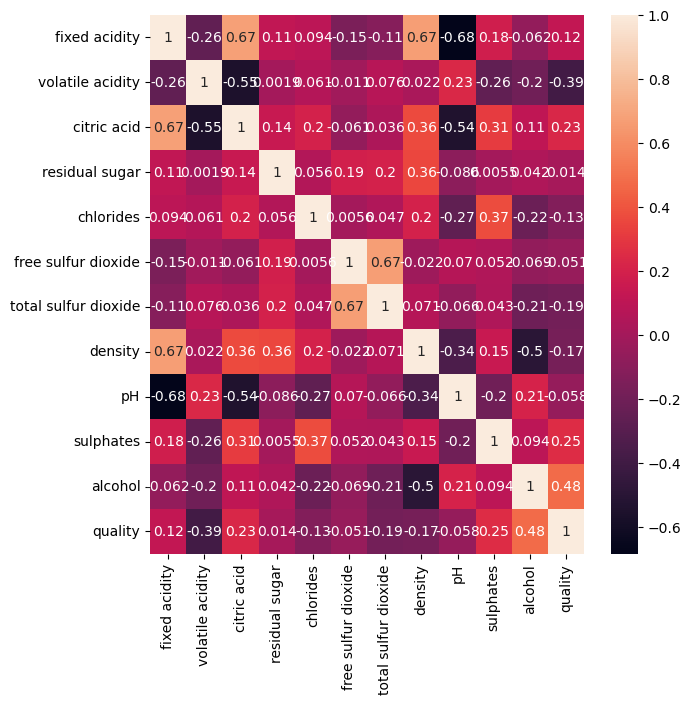

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
# Define features X
X = df.iloc[:,:-1]
# Define target y
y = df['quality']

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (1279, 11) (1279,)
Test set: (320, 11) (320,)


Text(0, 0.5, 'Cross-validated accuracy')

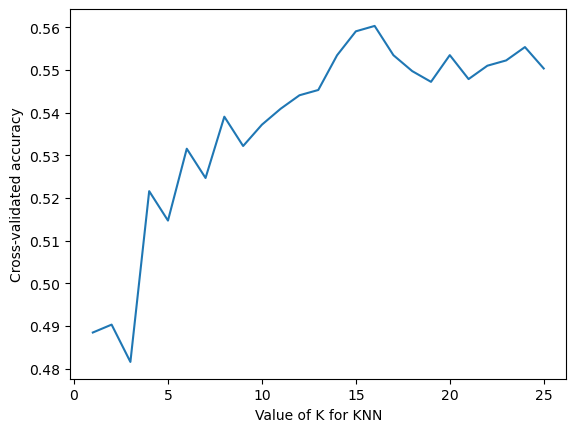

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# Number of k from 1 to 26
k_range = range(1, 26)
k_scores = []
# Calculate cross validation score for every k number from 1 to 26
for k in k_range:
 knn = KNeighborsClassifier(n_neighbors=k)
# It’s 10 fold cross validation with ‘accuracy’ scoring 
 scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy') 
 k_scores.append(scores.mean())
%matplotlib inline
# Plot accuracy for every k number between 1 and 26
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [ ]:
# Train the model and predict for k=19
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
# classification report for test set
print(metrics.classification_report(y_test, y_pred, digits=3, zero_division = 1))
# Calculate cv score with 'accuracy' scoring and 10 folds
accuracy = cross_val_score(knn, X, y, scoring = 'accuracy',cv=10)
print('cross validation score',accuracy.mean())
# Calculate cv score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(knn, X, y, scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc',accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,knn.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

           3      1.000     0.000     0.000         2
           4      0.000     0.000     0.000        11
           5      0.641     0.689     0.664       135
           6      0.596     0.613     0.604       142
           7      0.357     0.370     0.364        27
           8      1.000     0.000     0.000         3

    accuracy                          0.594       320
   macro avg      0.599     0.279     0.272       320
weighted avg      0.581     0.594     0.579       320

cross validation score 0.5603380503144655
cross validation score with roc_auc 0.7120894486872731
roc_auc_score 0.6590124522102546


In [ ]:
# import module
from sklearn.linear_model import LogisticRegression
# Train and fit model
logreg = LogisticRegression(multi_class='multinomial',solver ='newton-cg')
logreg.fit(X_train, y_train)
# Predict out-of-sample test set
y_pred = logreg.predict(X_test)
# classification report
print(metrics.classification_report(y_test, y_pred, digits=3, zero_division = 1))
print('accuracy',accuracy_score(y_test, y_pred))
# Calculate cv score with ‘roc_auc_ovr’ scoring and 10 folds
accuracy = cross_val_score(logreg, X, y, scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc',accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,logreg.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

           3      1.000     0.000     0.000         2
           4      1.000     0.000     0.000        11
           5      0.689     0.770     0.727       135
           6      0.638     0.634     0.636       142
           7      0.321     0.333     0.327        27
           8      1.000     0.000     0.000         3

    accuracy                          0.634       320
   macro avg      0.775     0.290     0.282       320
weighted avg      0.651     0.634     0.617       320

accuracy 0.634375
cross validation score with roc_auc 0.8122395666925059
roc_auc_score 0.7733433467826508


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Train and fit the Decision Tree Classification model
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
# Evaluate the model with out-of-sample test set
y_pred = tree.predict(X_test)
# Classification report
print(metrics.classification_report(y_test, y_pred.round(), digits=3))
# Calculate cv score with ‘roc_auc_ovr’ scoring and 10 folds
accuracy = cross_val_score(tree, X, y,scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc_ovr scoring',accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,tree.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

           3      0.000     0.000     0.000         2
           4      0.429     0.273     0.333        11
           5      0.761     0.756     0.758       135
           6      0.710     0.690     0.700       142
           7      0.528     0.704     0.603        27
           8      0.000     0.000     0.000         3

    accuracy                          0.694       320
   macro avg      0.405     0.404     0.399       320
weighted avg      0.696     0.694     0.693       320

cross validation score with roc_auc_ovr scoring 0.5768482985141795
roc_auc_score 0.6614764008960282


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Train and fit the Random Forest Classification model
forest = RandomForestClassifier(n_estimators=100,random_state = 0)
forest.fit(X_train, y_train)
# Test out-of-sample test set
y_pred = forest.predict(X_test)
# Classification report
print(metrics.classification_report(y_test, y_pred.round(), digits=3))
# Calculate cv score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(forest, X, y,scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc_ovr scoring',accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,forest.predict_proba(X_test), multi_class='ovr'))

C:\Users\itvedant\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\itvedant\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\itvedant\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           3      0.000     0.000     0.000         2
           4      0.000     0.000     0.000        11
           5      0.733     0.815     0.772       135
           6      0.732     0.711     0.721       142
           7      0.533     0.593     0.561        27
           8      0.000     0.000     0.000         3

    accuracy                          0.709       320
   macro avg      0.333     0.353     0.342       320
weighted avg      0.679     0.709     0.693       320

cross validation score with roc_auc_ovr scoring 0.7744698089165192
roc_auc_score 0.7731111820064127


In [ ]:
'''
It’s the best so far! The roc_auc_score is pretty good, the cross-validation score is the best so far and 
there are some recall results even for the minority classes. But it’s not enough yet. 
So one of the things that can be done to increase recall is oversampling the minority classes. 
For this purpose I used the random forest algorithm with SMOTE algorithm implementation.

Adding SMOTE algorithm

SMOTE (Synthetic Minority Over-Sampling) algorithm creates synthetic minority class samples to 
increase the representation of minority classes.
'''

In [ ]:
# Import SMOTE module
from imblearn.over_sampling import SMOTE
# Create model and fit the training set to create a new training set
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
# Create random forest model
forest = RandomForestClassifier(n_estimators=100,random_state = 0)
# Fit the model to the new train set
forest.fit(X_train_res, y_train_res.ravel())
# # Test out-of-sample test set
y_pred = forest.predict(X_test)
# Classification report
print(metrics.classification_report(y_test, y_pred.round(), digits=3))
# Calculate cv score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(forest, X, y,scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc_ovr scoring',accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,forest.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

           3      0.000     0.000     0.000         2
           4      0.167     0.182     0.174        11
           5      0.774     0.763     0.769       135
           6      0.750     0.676     0.711       142
           7      0.463     0.704     0.559        27
           8      0.000     0.000     0.000         3

    accuracy                          0.688       320
   macro avg      0.359     0.387     0.369       320
weighted avg      0.704     0.688     0.693       320

cross validation score with roc_auc_ovr scoring 0.7744698089165192
roc_auc_score 0.7416284678380908


In [ ]:
'''
Even though the accuracy is 
almost the same as the previous one, the recall results have significantly increased for minority classes.
'''